In [248]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/pokemon'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
url = r'../input/pokemon/pokemon_alopez247.csv'
pokemon = pd.read_csv(url)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/pokemon/pokemon_alopez247.csv
../input/pokemon/report_Pokemon.pdf


# Goal
As a kid I always found the adventure of Pokemon games appealing. Visiting various towns catching any pokemon you want as long as you had the skills to do it. I was also very curious about how catching the pokemon works but as a kid was too caught up in the fun of it. Revisiting this idea I realized data analysis could hold some answers, after all pokemon is just a large collection of creatures with various attributes. Looking at this from a buiness point of view, how their various attributes effects thier catch rate is valuable information in optimizing my use of reasources and my team. Since pokemon constitantly comes out with newer generations, it would also be benefical to create a model that would predict the catch rate of new generation based on thier attributes. 

In [249]:
# Number. Pokémon ID in the Pokédex.
# Name. Name of the Pokémon.
# Type_1. Primary type.
# Type_2. Second type, in case the Pokémon has it.
# Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).
# HP. Base Health Points.
# Attack. Base Attack.
# Defense. Base Defense.
# Sp_Atk. Base Special Attack.
# Sp_Def. Base Special Defense.
# Speed. Base Speed.
# Generation. Number of the generation when the Pokémon was introduced.
# isLegendary. Boolean that indicates whether the Pokémon is Legendary or not.
# Color. Color of the Pokémon according to the Pokédex.
# hasGender. Boolean that indicates if the Pokémon can be classified as female or male.
# Pr_male. In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.
# EggGroup1. Egg Group of the Pokémon.
# EggGroup2. Second Egg Group of the Pokémon, in case it has two.
# hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
# Height_m. Height of the Pokémon, in meters.
# Weight_kg. Weight of the Pokémon, in kilograms.
# Catch_Rate. Catch Rate.
# Body_Style. Body Style of the Pokémon according to the Pokédex.

In [250]:
#Visulatze data for Catch Rate then find the qualities that make catch rate more difficult. Predict catch rate
#for future generations
#I will be using the generation 1 catch method for identifying catch rate.

In [251]:
#Visualize and find any correlated data
pkmon = pokemon.copy()
pkmon.head(5)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [252]:
#First I wnat to identify all columns and convert all objects/bool to ints
#I will drop any variables that are unqiue to all pokemon like Names and numbers or variables.
pkmon.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [253]:
# Replace string objects as numerical place holders representing a type and create dataframe for reference
type_ref = pd.DataFrame()
pk_type = pkmon['Type_1'].unique()

for i, ele in enumerate(pk_type):
    pkmon['Type_1'].replace({ele:(i+1)}, inplace = True)
    type_ref = type_ref.append({ele:(i+1)}, ignore_index=True)
    
type_ref = pd.DataFrame(type_ref.mean().astype(int))
type_ref.rename(columns = {0:'Code Integer'}, inplace = True)



In [254]:
type_ref

,Code Integer
Grass,1
Fire,2
Water,3
Bug,4
Normal,5
Poison,6
Electric,7
Ground,8
Fairy,9
Fighting,10


In [255]:
type_ref2 = pd.DataFrame()
pk_type2 = pkmon['Type_2'].unique()


for i, ele in enumerate(pk_type2):
    pkmon['Type_2'].replace({ele:(i+1)}, inplace = True)
    type_ref2 = type_ref2.append({ele:(i+1)}, ignore_index=True)
    
type_ref2 = pd.DataFrame(type_ref2.mean().astype(int))
type_ref2.rename(columns = {0:'Code Integer'}, inplace = True)

In [256]:
type_ref2

,Code Integer
Poison,1
NaN,2
Flying,3
Ground,4
Fairy,5
Grass,6
Fighting,7
Psychic,8
Steel,9
Ice,10


In [257]:
#Check that both Types are changed (Reference:type_ref2,type_ref )
pkmon.dtypes

Number                int64
Name                 object
Type_1                int64
Type_2                int64
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [258]:
#Gather all booleans and change them to True = 1 and False = 0
pkmon[['isLegendary','hasGender','hasMegaEvolution']] = pkmon[['isLegendary','hasGender','hasMegaEvolution']].replace({True:1, False:0})

In [259]:
# All booleans are now ints
pkmon.dtypes

Number                int64
Name                 object
Type_1                int64
Type_2                int64
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary           int64
Color                object
hasGender             int64
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution      int64
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [260]:
#Color
pkmon['Color'].unique()

array(['Green', 'Red', 'Blue', 'White', 'Brown', 'Yellow', 'Purple',
       'Pink', 'Grey', 'Black'], dtype=object)

In [261]:
color_ref = pd.DataFrame()
pk_color = pkmon['Color'].unique()


for i, ele in enumerate(pk_color):
    pkmon['Color'].replace({ele:(i+1)}, inplace = True)
    color_ref = color_ref.append({ele:(i+1)}, ignore_index=True)
    
color_ref = pd.DataFrame(color_ref.mean().astype(int))
color_ref.rename(columns = {0:'Code Integer'}, inplace = True)

In [262]:
color_ref

,Code Integer
Green,1
Red,2
Blue,3
White,4
Brown,5
Yellow,6
Purple,7
Pink,8
Grey,9
Black,10


In [263]:
pkmon.dtypes

Number                int64
Name                 object
Type_1                int64
Type_2                int64
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary           int64
Color                 int64
hasGender             int64
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution      int64
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [264]:
egg_ref = pd.DataFrame()
egg_type = pkmon['Egg_Group_1'].unique()

for i, ele in enumerate(egg_type):
    pkmon['Egg_Group_1'].replace({ele:(i+1)}, inplace = True)
    egg_ref = egg_ref.append({ele:(i+1)}, ignore_index=True)
    
egg_ref = pd.DataFrame(egg_ref.mean().astype(int))
egg_ref.rename(columns = {0:'Code Integer'}, inplace = True)


In [265]:
egg_ref

,Code Integer
Monster,1
Bug,2
Flying,3
Field,4
Undiscovered,5
Fairy,6
Grass,7
Water_1,8
Human-Like,9
Water_3,10


In [266]:
egg_ref2 = pd.DataFrame()
egg_type = pkmon['Egg_Group_2'].unique()

for i, ele in enumerate(egg_type):
    pkmon['Egg_Group_2'].replace({ele:(i+1)}, inplace = True)
    egg_ref2 = egg_ref2.append({ele:(i+1)}, ignore_index=True)
    
egg_ref2 = pd.DataFrame(egg_ref2.mean().astype(int))
egg_ref2.rename(columns = {0:'Code Integer'},  inplace = True)

In [267]:
egg_ref2

,Code Integer
Grass,1
Dragon,2
Water_1,3
NaN,4
Fairy,5
Field,6
Water_3,7
Water_2,8
Flying,9
Bug,10


In [268]:
body_ref = pd.DataFrame()
body_type = pkmon['Body_Style'].unique()

for i, ele in enumerate(body_type):
    pkmon['Body_Style'].replace({ele:(i+1)}, inplace = True)
    body_ref = body_ref.append({ele:(i+1)}, ignore_index=True)
    
body_ref = pd.DataFrame(body_ref.mean().astype(int))
body_ref.rename(columns = {0:'Code Integer'},  inplace = True)

In [269]:
body_ref

,Code Integer
quadruped,1
bipedal_tailed,2
insectoid,3
serpentine_body,4
four_wings,5
two_wings,6
bipedal_tailless,7
head_legs,8
head_base,9
multiple_bodies,10


In [270]:
pkmon.dtypes

Number                int64
Name                 object
Type_1                int64
Type_2                int64
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary           int64
Color                 int64
hasGender             int64
Pr_Male             float64
Egg_Group_1           int64
Egg_Group_2           int64
hasMegaEvolution      int64
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style            int64
dtype: object

In [271]:
#If user wanted to reference name for future since we will drop name and number since the the name and number themsl=elves are idepent are all independent of catch_rate
pkmon_name_reference = pkmon.copy()
#Proof: If there is a 1 to 1 correlation between dataframe and variable its independent and we can drop them
print('It is',pkmon.shape[0] == len(pkmon['Name'].unique()), 'that Pokemons name are independent and it is',\
      pkmon.shape[0] == len(pkmon['Number'].unique()),'that Pokemons numbers are independent')

pkmon.drop(['Name','Number'], axis = 1, inplace =True)

It is True that Pokemons name are independent and it is True that Pokemons numbers are independent


In [272]:
pkmon.dtypes

Type_1                int64
Type_2                int64
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary           int64
Color                 int64
hasGender             int64
Pr_Male             float64
Egg_Group_1           int64
Egg_Group_2           int64
hasMegaEvolution      int64
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style            int64
dtype: object

In [273]:
#All ints and floats! Now I will clean data for Nulls
pkmon.isnull().sum()

Type_1               0
Type_2               0
Total                0
HP                   0
Attack               0
Defense              0
Sp_Atk               0
Sp_Def               0
Speed                0
Generation           0
isLegendary          0
Color                0
hasGender            0
Pr_Male             77
Egg_Group_1          0
Egg_Group_2          0
hasMegaEvolution     0
Height_m             0
Weight_kg            0
Catch_Rate           0
Body_Style           0
dtype: int64

In [274]:
pkmon['Pr_Male']= pkmon['Pr_Male'].fillna(pkmon.Pr_Male.mean())

In [275]:
#There are no more null values!
pkmon.isnull().sum()

Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
Egg_Group_2         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

In [276]:
#Final dataset in all numerical dataset, ready for Data Exploration then for normalization for 
#since in the real world we don't have access to the test set

pkmon.head(5)

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,1,318,45,49,49,65,65,45,1,...,1,1,0.875,1,1,0,0.71,6.9,45,1
1,1,1,405,60,62,63,80,80,60,1,...,1,1,0.875,1,1,0,0.99,13.0,45,1
2,1,1,525,80,82,83,100,100,80,1,...,1,1,0.875,1,1,1,2.01,100.0,45,1
3,2,2,309,39,52,43,60,50,65,1,...,2,1,0.875,1,2,0,0.61,8.5,45,2
4,2,2,405,58,64,58,80,65,80,1,...,2,1,0.875,1,2,0,1.09,19.0,45,2


# Data Exploration

In [277]:
pkmon.columns

Index(['Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk',
       'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender',
       'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m',
       'Weight_kg', 'Catch_Rate', 'Body_Style'],
      dtype='object')

In [278]:
#0-0.3 is scarce correlation, 0.3-0.7 is moderate, 0.7-1 is strong
#mostly negative correlation which makes sense since catch rate should go down with with higher level stats .1 to .4 
import seaborn as sns
corr = pd.DataFrame(pkmon.corr()['Catch_Rate'])
corr.drop(index = 'Catch_Rate', inplace = True)
corr.sort_values(by='Catch_Rate', inplace = True)

In [279]:
cor = corr.reset_index()

Text(16, 0.17, 'Little to no correlation')

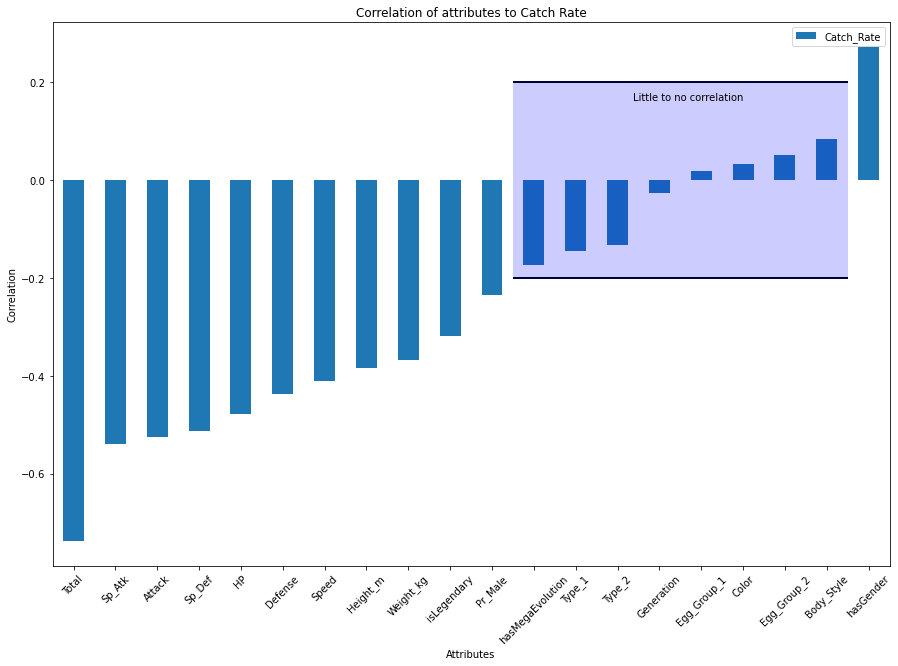

In [280]:
#We see here that physical attributes contributes most to a diminishing catch rate. We will group by two cateragories. Physical strength
#characteristics which have a clear boundary at -.4
cor.plot(kind='bar',x='index', y='Catch_Rate', figsize=(15,10), rot = 45)

plt.hlines(y=.2,xmin=10.5,xmax=18.5,lw=2,color='black')
plt.hlines(y=-.2,xmin=10.5,xmax=18.5,lw=2,color='black')
plt.hlines(y=0,xmin=10.5,xmax=18.5,lw=198,color='blue',alpha=0.2)
plt.ylabel('Correlation')
plt.xlabel('Attributes')
plt.title('Correlation of attributes to Catch Rate')
plt.text(16, .17, 'Little to no correlation', ha='right', va='center')

In [281]:
#Filters out any attributes falling into the shaded region
gud_cor = corr.where((corr['Catch_Rate'] >= 0.2) | (corr['Catch_Rate']<= -0.2)).dropna()

In [282]:
#With our good correlation, all int/float and no nulls attribute we will now check the datas variance and if there are any outliers.
gud_cor

,Catch_Rate
Total,-0.738280
Sp_Atk,-0.539114
Attack,-0.525106
Sp_Def,-0.513014
HP,-0.478725
Defense,-0.436558
Speed,-0.410557
Height_m,-0.382862
Weight_kg,-0.367798
isLegendary,-0.319302


In [283]:
pkmon1 = pkmon.copy()
pkmon2 = pkmon.copy()
gud= gud_cor.index.tolist()
gud.append('Catch_Rate')
for i, ele in enumerate(gud):
    pkmon1.drop(ele, axis = 1, inplace = True)

In [284]:
gud = pkmon1.columns.tolist()
for i, ele in enumerate(gud):
    pkmon2.drop(ele, axis = 1, inplace = True)

In [285]:
pkmon_0 = pkmon2.copy()

Total             AxesSubplot(0.125,0.787927;0.133621x0.0920732)
HP             AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
Attack          AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Defense        AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Sp_Atk         AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
Sp_Def            AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Speed          AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
isLegendary     AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
hasGender      AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
Pr_Male        AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
Height_m          AxesSubplot(0.125,0.566951;0.133621x0.0920732)
Weight_kg      AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
Catch_Rate      AxesSubplot(0.44569,0.566951;0.133621x0.0920732)
dtype: object

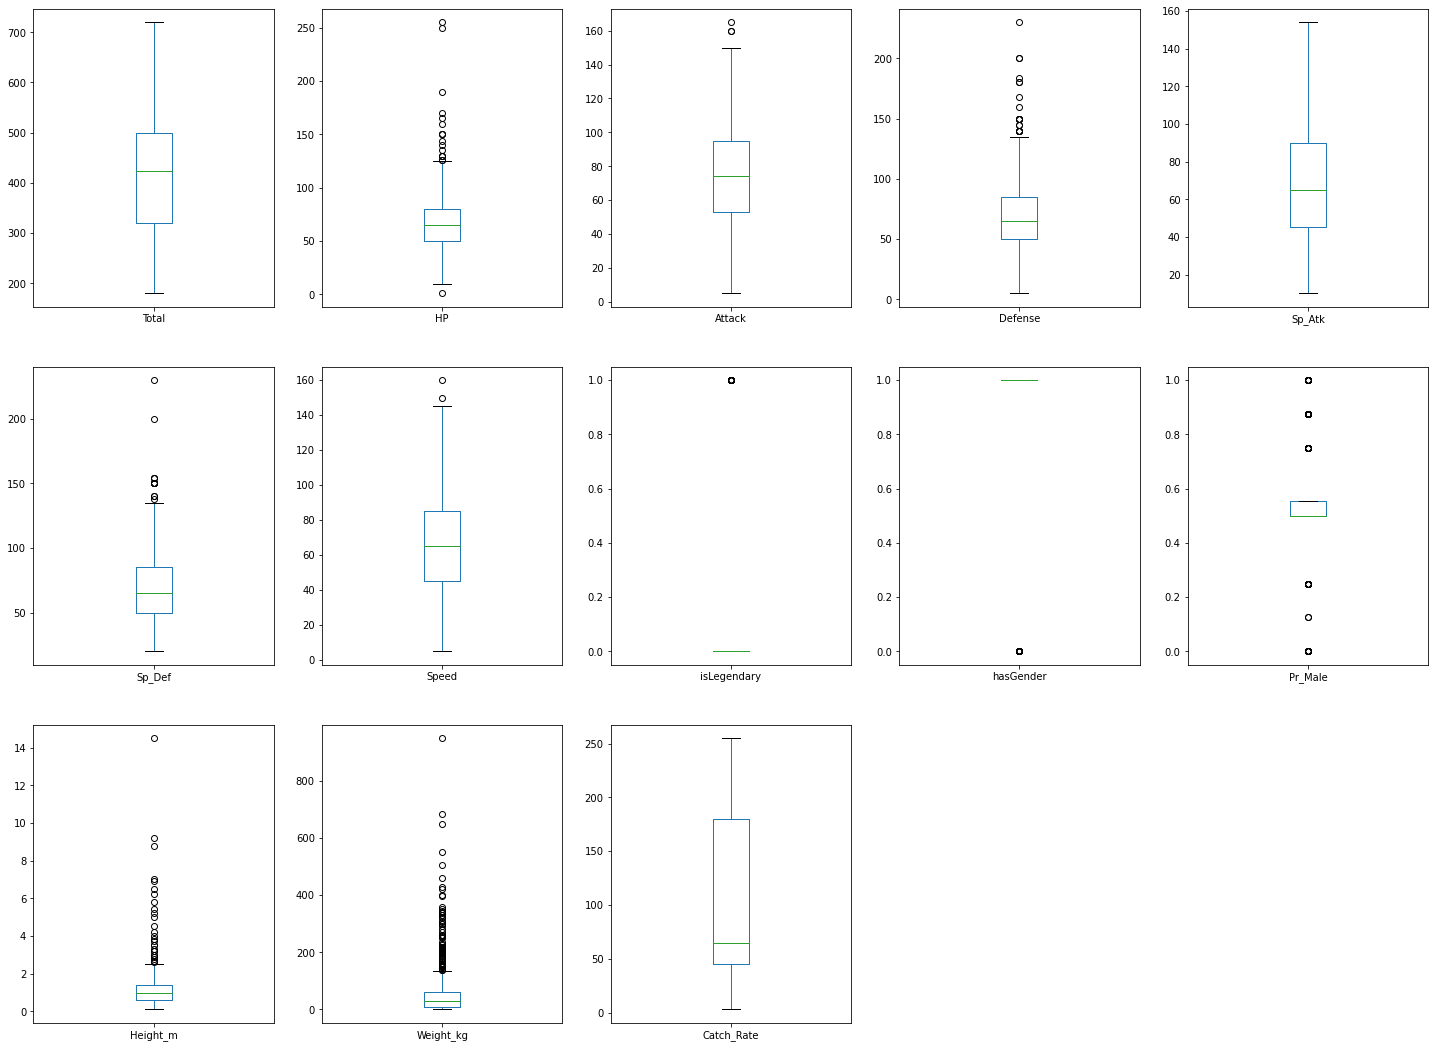

In [286]:
#Distibution of all colum points to identify any abnormal data points
pkmon_0.plot(kind='box',subplots=True,layout=(int(pkmon2.shape[1]/2)+1,5), figsize=(25,45))

In [287]:
#pkmon2 = pkmon2.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [288]:
#Lengendary pokemon are by nature outliers so if any outliers so creating two group to predict common and legendary catch rates would be 
#more accurate
pkmon_0.loc[pkmon_0['Weight_kg']>=800]
pk_all = pkmon_0.copy()

In [289]:
pk_leg = pk_all.where(pk_all['isLegendary'] == 1).dropna()
pk_com = pk_all.where(pk_all['isLegendary'] == 0).dropna()

In [290]:
pk_leg.drop(['isLegendary'],axis = 1, inplace=True)
pk_com.drop(['isLegendary'],axis = 1, inplace=True)
pk_leg.drop(['Pr_Male'],axis = 1, inplace=True)
pk_com.drop(['Pr_Male'],axis = 1, inplace=True)

Total            AxesSubplot(0.125,0.772143;0.133621x0.107857)
HP            AxesSubplot(0.285345,0.772143;0.133621x0.107857)
Attack         AxesSubplot(0.44569,0.772143;0.133621x0.107857)
Defense       AxesSubplot(0.606034,0.772143;0.133621x0.107857)
Sp_Atk        AxesSubplot(0.766379,0.772143;0.133621x0.107857)
Sp_Def           AxesSubplot(0.125,0.642714;0.133621x0.107857)
Speed         AxesSubplot(0.285345,0.642714;0.133621x0.107857)
hasGender      AxesSubplot(0.44569,0.642714;0.133621x0.107857)
Height_m      AxesSubplot(0.606034,0.642714;0.133621x0.107857)
Weight_kg     AxesSubplot(0.766379,0.642714;0.133621x0.107857)
Catch_Rate       AxesSubplot(0.125,0.513286;0.133621x0.107857)
dtype: object

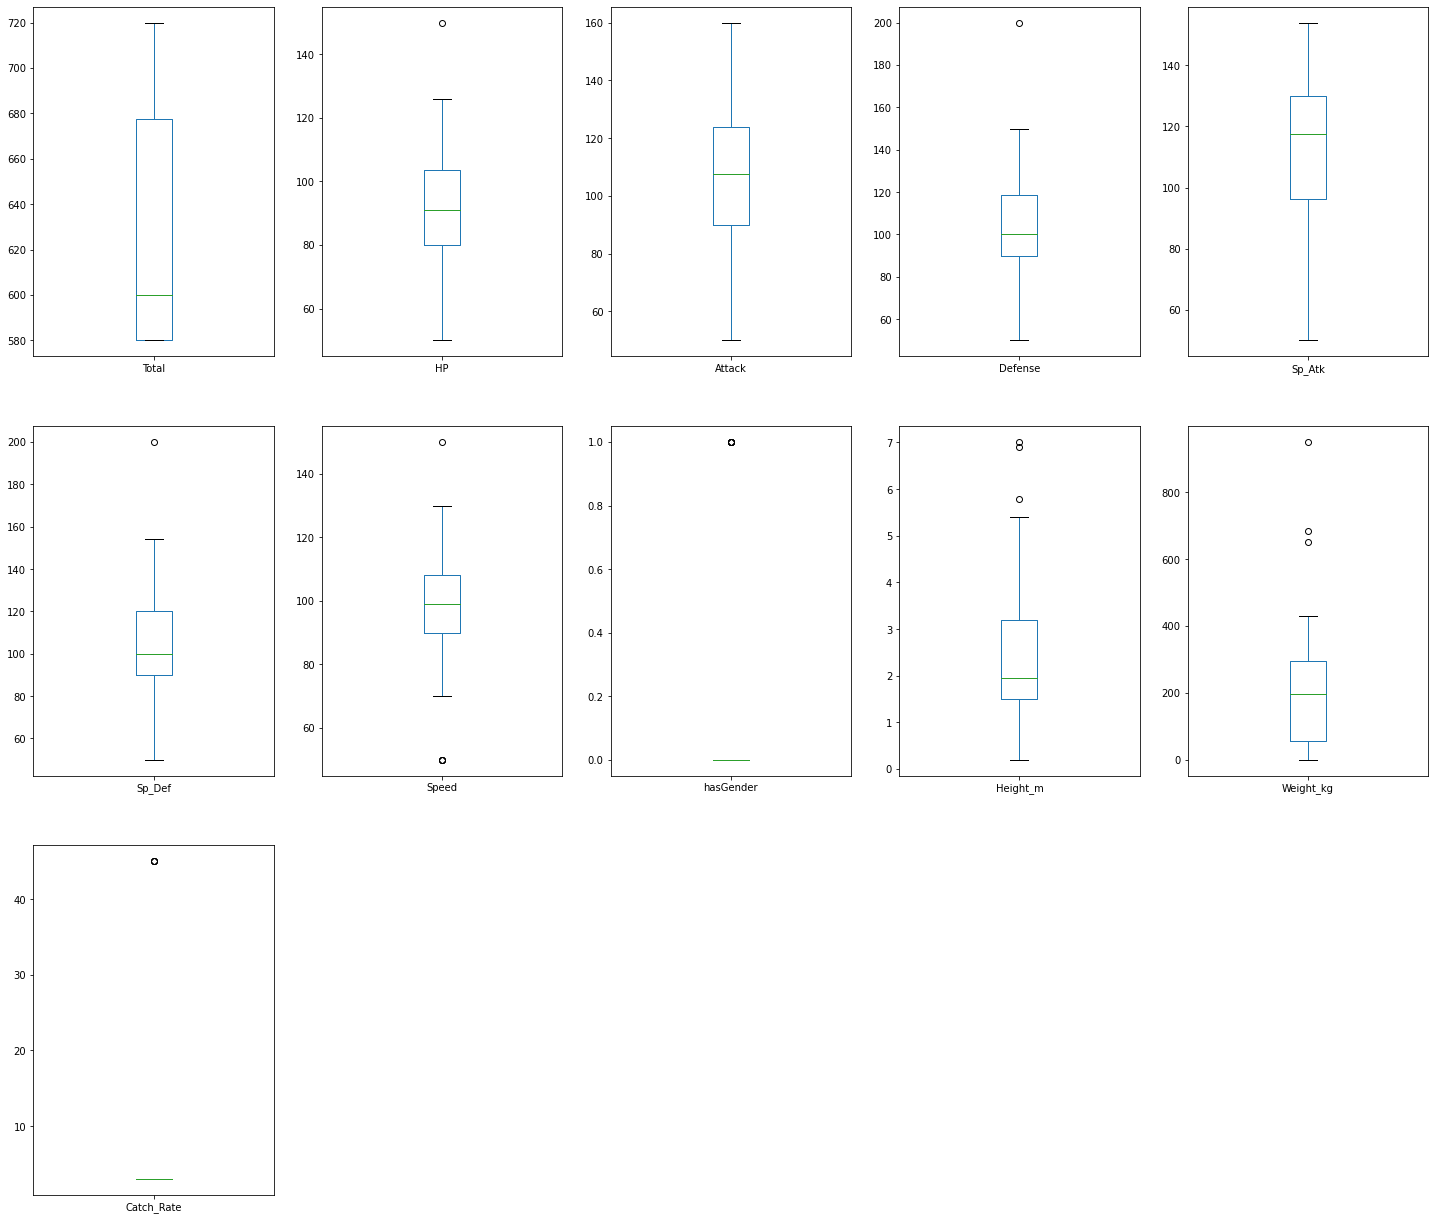

In [291]:
#This distribution looks a lot more focused
pk_leg.plot(kind='box',subplots=True,layout=(int(pk_leg.shape[1]/2)+1,5), figsize=(25,45))

In [292]:
pk_leg.where(pk_leg['HP'] > 140).dropna()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,hasGender,Height_m,Weight_kg,Catch_Rate
486,680.0,150.0,120.0,100.0,120.0,100.0,90.0,0.0,6.91,650.0,3.0


Total            AxesSubplot(0.125,0.772143;0.133621x0.107857)
HP            AxesSubplot(0.285345,0.772143;0.133621x0.107857)
Attack         AxesSubplot(0.44569,0.772143;0.133621x0.107857)
Defense       AxesSubplot(0.606034,0.772143;0.133621x0.107857)
Sp_Atk        AxesSubplot(0.766379,0.772143;0.133621x0.107857)
Sp_Def           AxesSubplot(0.125,0.642714;0.133621x0.107857)
Speed         AxesSubplot(0.285345,0.642714;0.133621x0.107857)
hasGender      AxesSubplot(0.44569,0.642714;0.133621x0.107857)
Height_m      AxesSubplot(0.606034,0.642714;0.133621x0.107857)
Weight_kg     AxesSubplot(0.766379,0.642714;0.133621x0.107857)
Catch_Rate       AxesSubplot(0.125,0.513286;0.133621x0.107857)
dtype: object

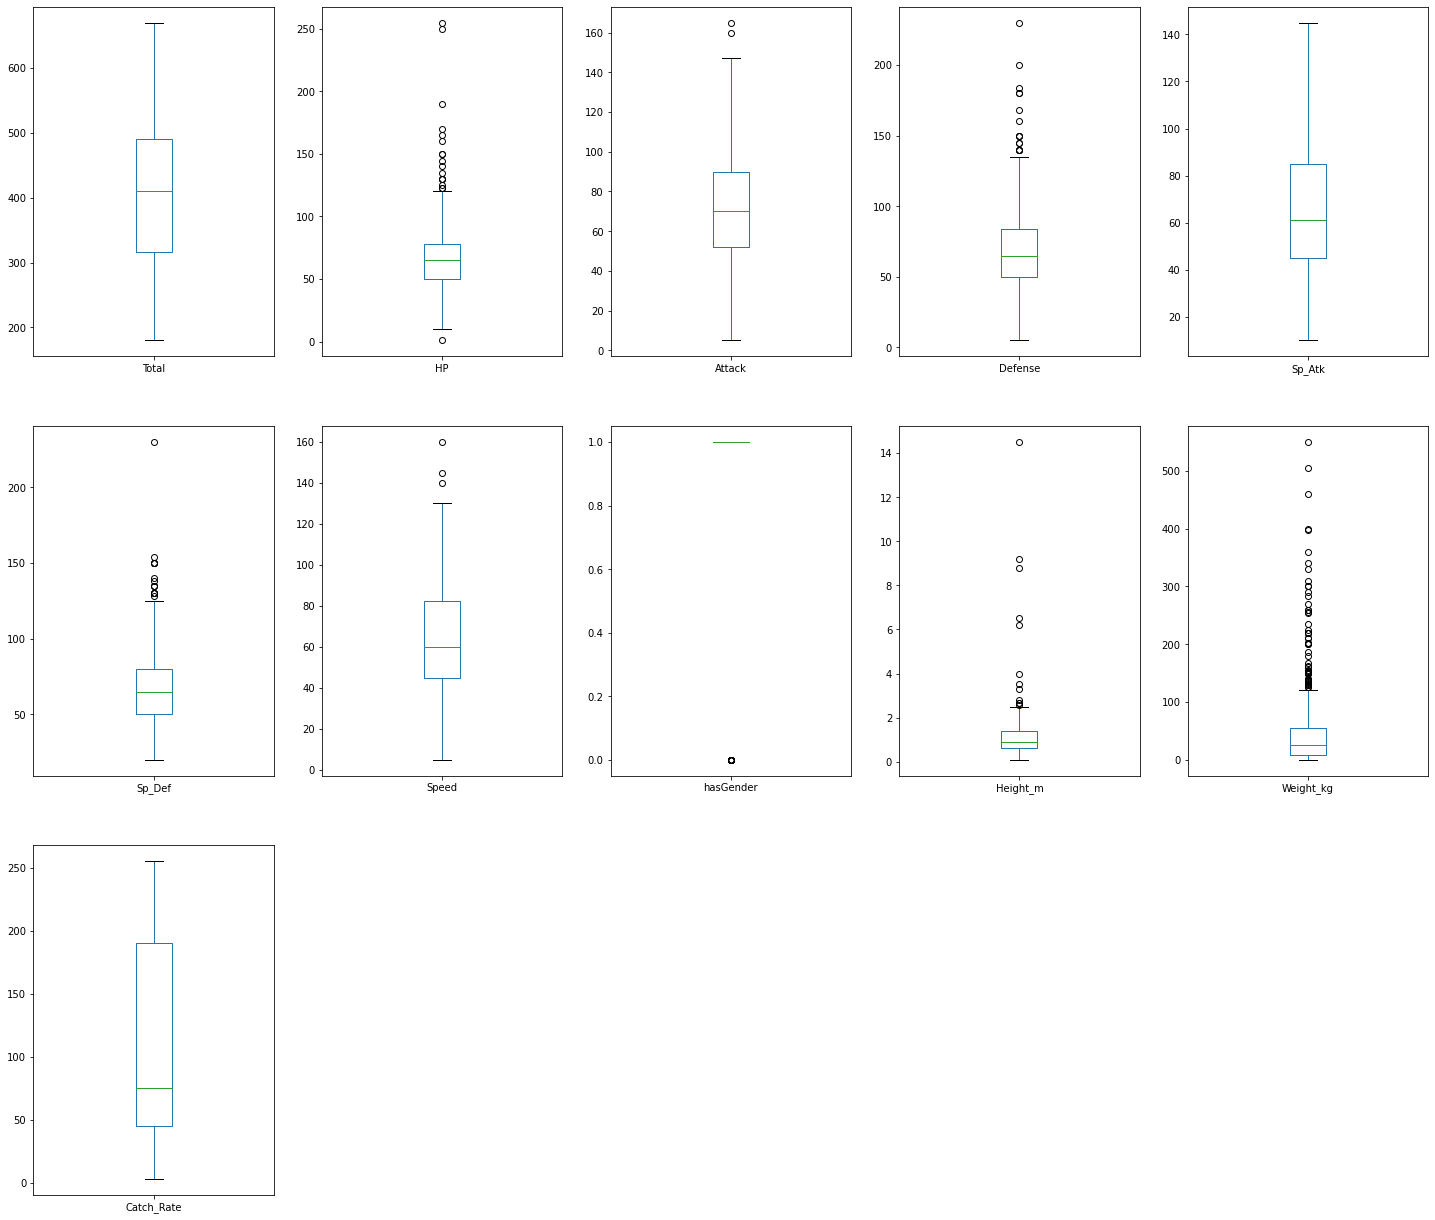

In [293]:
#This distribution has a few outliers but the overall distinction between legendaries will help future predictions
pk_com.plot(kind='box',subplots=True,layout=(int(pk_com.shape[1]/2)+1,5), figsize=(25,45))

In [294]:
#Total is too large for StandardScalr after trying to run the model. It is the summation of of physical attributes so 
# pk_com.describe()
# pk_com.drop(['hasGender'], axis = 1, )

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,0.71,6.9,45.0
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,0.99,13.0,45.0
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,2.01,100.0,45.0
3,309.0,39.0,52.0,43.0,60.0,50.0,65.0,0.61,8.5,45.0
4,405.0,58.0,64.0,58.0,80.0,65.0,80.0,1.09,19.0,45.0
...,...,...,...,...,...,...,...,...,...,...
710,494.0,65.0,90.0,122.0,58.0,75.0,84.0,1.70,39.0,60.0
711,304.0,55.0,69.0,85.0,32.0,35.0,28.0,0.99,99.5,190.0
712,514.0,95.0,117.0,184.0,44.0,46.0,28.0,2.01,505.0,55.0
713,245.0,40.0,30.0,35.0,45.0,40.0,55.0,0.51,8.0,190.0


In [295]:
#Based on the differnces in values from column to column we will normalize after splitting data
pk_leg.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,hasGender,Height_m,Weight_kg,Catch_Rate
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,620.217391,94.000000,108.608696,101.586957,113.891304,106.543478,95.586957,0.130435,2.449565,201.797826,6.652174
std,44.993290,18.808981,23.536712,26.525104,25.432462,27.236174,20.436977,0.340503,1.723660,197.172328,11.965167
min,580.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.000000,0.200000,0.300000,3.000000
25%,580.000000,80.000000,90.000000,90.000000,96.250000,90.000000,90.000000,0.000000,1.500000,56.550000,3.000000
50%,600.000000,91.000000,107.500000,100.000000,117.500000,100.000000,99.000000,0.000000,1.960000,196.500000,3.000000
75%,677.500000,103.750000,123.750000,118.750000,130.000000,120.000000,108.000000,0.000000,3.200000,293.750000,3.000000
max,720.000000,150.000000,160.000000,200.000000,154.000000,200.000000,150.000000,1.000000,7.010000,950.000000,45.000000


In [324]:
#Since well be testing ordinal y values in numerically ordered data. 
catch_ref_com = pd.DataFrame()
catch_type_com = pk_com['Catch_Rate'].unique()

for i, ele in enumerate(catch_type_com):
    pk_com['Catch_Rate'].replace({ele:(i+1)}, inplace = True)
    catch_ref_com = catch_ref_com.append({ele:(i+1)}, ignore_index=True)
    
catch_ref_com = pd.DataFrame(catch_ref_com.mean().astype(int))
catch_ref_com.rename(columns = {0:'Code Integer'},  inplace = True)
catch_ref_com

,Code Integer
45.0,1
255.0,2
120.0,3
127.0,4
90.0,5
190.0,6
75.0,7
235.0,8
150.0,9
25.0,10


In [325]:
catch_ref_leg = pd.DataFrame()
catch_type_leg = pk_leg['Catch_Rate'].unique()

for i, ele in enumerate(catch_type_leg):
    pk_leg['Catch_Rate'].replace({ele:(i+1)}, inplace = True)
    catch_ref_leg = catch_ref_leg.append({ele:(i+1)}, ignore_index=True)
    
catch_ref_leg = pd.DataFrame(catch_ref_leg.mean().astype(int))
catch_ref_leg.rename(columns = {0:'Code Integer'},  inplace = True)
catch_ref_leg

,Code Integer
3.0,1
45.0,2


# Machine Learning Model
With 2 datasets showing fairly strong correlation to catch rate I will now implement 4 machince learning techniques and find which model has the best predictions after splitting data

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [328]:
pk_com.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'hasGender', 'Height_m', 'Weight_kg', 'Catch_Rate'],
      dtype='object')

In [330]:
X_com = pk_com[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'hasGender', 'Height_m', 'Weight_kg']]
y_com = pk_com['Catch_Rate']
X_leg = pk_leg[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'hasGender', 'Height_m', 'Weight_kg']]
y_leg = pk_leg['Catch_Rate']

In [331]:
X_train_com, X_test_com, y_train_com, y_test_com = train_test_split(X_com, y_com, test_size = .4, random_state= 42)
X_train_leg, X_test_leg, y_train_leg, y_test_leg = train_test_split(X_leg, y_leg, test_size = .4, random_state= 42)

In [332]:
#Check the dimensions to make sure everything was split properly
(X_train_com.shape[0] == y_train_com.shape[0])==(X_train_leg.shape[0] == y_train_leg.shape[0])

True

In [334]:
from sklearn.preprocessing import StandardScaler
#Normailze now since in real world senerio a test set would come after the model been trained. 
scaler = StandardScaler()
X_train_com = scaler.fit_transform(X_train_com)
X_test_com = scaler.transform(X_test_com)
X_train_leg = scaler.fit_transform(X_train_leg)
X_test_leg = scaler.transform(X_test_leg)

In [357]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier

In [358]:
#Common
lr = LogisticRegression(solver='lbfgs', max_iter=120)
lr_com = lr.fit(X_train_com, y_train_com)
y_pred_com = lr_com.predict(X_test_com)
#Legendaries
lr = LogisticRegression()
lr_leg = lr.fit(X_train_leg, y_train_leg)
y_pred_leg = lr_leg.predict(X_test_leg)

print('Common Accuracy:',metrics.accuracy_score(y_test_com,y_pred_com))
print('Legendary Accuracy:', metrics.accuracy_score(y_test_leg,y_pred_leg))

Common Accuracy: 0.34814814814814815
Legendary Accuracy: 1.0


In [359]:
#Common
kn = KNeighborsClassifier(n_neighbors=49)
kn_com = kn.fit(X_train_com, y_train_com)
y_pred_com = kn_com.predict(X_test_com)
#Legendary
kn = KNeighborsClassifier(n_neighbors=3)
kn_leg = kn.fit(X_train_leg, y_train_leg)
y_pred_leg = kn_leg.predict(X_test_leg)

print('Common Accuracy:',metrics.accuracy_score(y_test_com,y_pred_com))
print('Legendary Accuracy:', metrics.accuracy_score(y_test_leg,y_pred_leg))

Common Accuracy: 0.3888888888888889
Legendary Accuracy: 1.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f029db3f590>,
 <a list of 9 Text major ticklabel objects>)

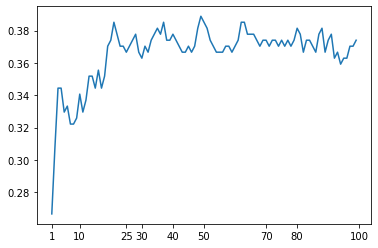

In [360]:
a_index=list(range(1,100))
a=pd.Series()
x=[1,10,25,30,40,50,70,80,100]
for i in list(range(1,100)):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn_com = kn.fit(X_train_com, y_train_com)
    y_pred_com = kn_com.predict(X_test_com)
    a=a.append(pd.Series(metrics.accuracy_score(y_pred_com,y_test_com)))
plt.plot(a_index, a)
plt.xticks(x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f029daa66d0>,
 <a list of 10 Text major ticklabel objects>)

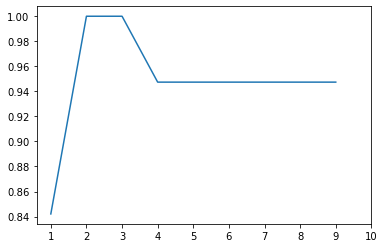

In [361]:
a_index=list(range(1,10))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,10)):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn_leg = kn.fit(X_train_leg, y_train_leg)
    y_pred_leg = kn_leg.predict(X_test_leg)
    a=a.append(pd.Series(metrics.accuracy_score(y_pred_leg,y_test_leg)))
plt.plot(a_index, a)
plt.xticks(x)

In [362]:
#Common
s = svm.SVC()
s_com = s.fit(X_train_com, y_train_com)
y_pred_com = s_com.predict(X_test_com)
#Legendary
s = svm.SVC()
s_leg = s.fit(X_train_leg, y_train_leg)
y_pred_leg = s_leg.predict(X_test_leg)

print('Common Accuracy:',metrics.accuracy_score(y_test_com,y_pred_com))
print('Legendary Accuracy:', metrics.accuracy_score(y_test_leg,y_pred_leg))

Common Accuracy: 0.36666666666666664
Legendary Accuracy: 0.9473684210526315


In [363]:
#Common
dtc = DecisionTreeClassifier()
dtc_com = dtc.fit(X_train_com, y_train_com)
y_pred_com = dtc_com.predict(X_test_com)
#Legendary
dtc = DecisionTreeClassifier()
dtc_leg = dtc.fit(X_train_leg, y_train_leg)
y_pred_leg = dtc_leg.predict(X_test_leg)

print('Common Accuracy:',metrics.accuracy_score(y_test_com,y_pred_com))
print('Legendary Accuracy:', metrics.accuracy_score(y_test_leg,y_pred_leg))

Common Accuracy: 0.24814814814814815
Legendary Accuracy: 0.8947368421052632


In [374]:
#Negative values, not an ideal model
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

clf = LinearRegression()
clf.fit(X_train_com,y_train_com)
y_pred_com = clf.predict(X_test_com)
print(r2_score(y_test_com,y_pred_com))
print(1-(1-r2_score(y_test_com, y_pred_com))*((len(X_test_com)-1)/(len(X_test_com)-len(X_test_com[0])-1)))


-0.0750613546866592
-0.11656951509927138


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [366]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
y_train_com = labelencoder.fit_transform(y_train_com)
y_test_com = labelencoder.fit_transform(y_test_com)

In [367]:
# y_train_com-=1 # range from 1 to 19 -> range from 0 to 18
# enc = OneHotEncoder(n_categories=29)
# y_train_com = enc.fit_transform(y_train_com).toarray()

In [376]:
import mord
from mord import LogisticAT

#Other Regression Models
clf2 = mord.LogisticAT(alpha=1.)
clf2.fit(X_train_com, y_train_com)
print('Mean Absolute Error of LogisticAT %s' %
      metrics.mean_absolute_error(clf2.predict(X_test_com), y_test_com))
print(metrics.accuracy_score(clf2.predict(X_test_com), y_test_com))
clf3 = mord.LogisticIT(alpha=1.)
clf3.fit(X_train_com, y_train_com)
print('Mean Absolute Error of LogisticIT %s' %
      metrics.mean_absolute_error(clf3.predict(X_test_com), y_test_com))
print(metrics.accuracy_score(clf3.predict(X_test_com), y_test_com))
clf4 = mord.LogisticSE(alpha=1.)
clf4.fit(X_train_com, y_train_com)
print('Mean Absolute Error of LogisticSE %s' %
      metrics.mean_absolute_error(clf4.predict(X_test_com), y_test_com))
print(metrics.accuracy_score(clf4.predict(X_test_com), y_test_com))

Mean Absolute Error of LogisticAT 5.607407407407408
0.10740740740740741
Mean Absolute Error of LogisticIT 8.337037037037037
0.2851851851851852
Mean Absolute Error of LogisticSE 6.022222222222222
0.040740740740740744


In [371]:
#still less then linear regression
print('Highest Regression Accuracy:',metrics.accuracy_score(clf3.predict(X_test_com), y_test_com))

Highest Regression Accuracy: 0.2851851851851852


# Results
The models accruacy for Legendary is 100% for kNN and for Logistic Regression which makes sense considering output is biniary. This model works well with binary targets. I only had around 38% accuracy with kNN model for Common. Linear regression has an adjusted R2 score in the negative which is less than ideal. After exploring other forms of regression the highest accuracy is 28%. The best model is kNN for both Common and Legendary.

# Places of Improvement
The data distribution was still fairly off in the common pokemon data set. While I was unsure how much it would effect my model it seems as though it effected it the most. Comparing Legendary to Common distribution there is a large difference which would be my guess as to why there is such a large difference in accuracy for this prediction. Also my method of assessing multiple target cariables could of been less than ideal.

# For the Future 
It would be best to focus on distribution of data and making sure that all the data points lie with in the box plot range. Unfortunatly this dataset had built in outliers (legendaries) that were meant to be distort any pattern which is why I seperated them from the common pokemon. Overall, I look foward to returning to this model in the future to try and find a way to increase the accuracy of the common pokemon catch rate.